# Analysis of Red Wine Quality

In this project, we are going to analyze the quality of Red Wines based on different sensory input data.

Dataset location - https://www.kaggle.com/danielpanizzo/wine-quality

The above Kaggle link contains 2 datasets, 1 for red wines and other for white wines. In this project, we will only analyze red wines dataset.

We will be using pandas, matplotlib, seaborn libraries for analyzing and vizualizing the dataset.

Thanks to the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com), which has helped me to gain basic knowledge on Python and different libraries, modules used for data analysis and visualization.

## Description of attributes:

- fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
- volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
- citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines
- residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
- chlorides: the amount of salt in the wine
- free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
- total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
- density: the density of water is close to that of water depending on the percent alcohol and sugar content
- pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
- sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
- alcohol: the percent alcohol content of the wine
- quality: output variable (score between 0 and 10)

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/danielpanizzo/wine-quality?select=wineQualityReds.csv' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dlokesh16
Your Kaggle Key: ········


100%|██████████| 108k/108k [00:00<00:00, 7.89MB/s]

The dataset has been downloaded and extracted.

In [4]:
# Change this
data_dir = './wine-quality'

In [5]:
import os
os.listdir(data_dir)

['wineQualityWhites.csv', 'wineQualityReds.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "zerotopandas-analysis-red-wine-quality"

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "d-lokesh16/zerotopandas-analysis-red-wine-quality" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/d-lokesh16/zerotopandas-analysis-red-wine-quality


'https://jovian.ai/d-lokesh16/zerotopandas-analysis-red-wine-quality'

## Data Preparation and Cleaning

In this step, let's check for the data correctness, missing data and the type of data for each columns.

- shape - to get the overall count of observations and columns
- describe() - to get the basic statistics about the dataset
- info() - to get the information about non-null counts and column data types
- isna().count() - to get the count of not-null values for each columns


In [10]:
!pip install pandas --upgrade --quiet

In [11]:
import pandas as pd

In [12]:
wines_df = pd.read_csv(data_dir + '/wineQualityReds.csv', index_col = 0)

In [13]:
wines_df

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
2,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
3,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
4,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1595,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1596,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1598,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [14]:
wines_df.shape

(1599, 12)

In [15]:
wines_df.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Seems like *free.sulfur.dioxide* and *total.sulfur.dioxide* have high deviation and all other columns seems to be fine. No negative values.

In [16]:
wines_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 1 to 1599
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         1599 non-null   float64
 1   volatile.acidity      1599 non-null   float64
 2   citric.acid           1599 non-null   float64
 3   residual.sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free.sulfur.dioxide   1599 non-null   float64
 6   total.sulfur.dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 162.4 KB


In [17]:
wines_df.isna().count()

fixed.acidity           1599
volatile.acidity        1599
citric.acid             1599
residual.sugar          1599
chlorides               1599
free.sulfur.dioxide     1599
total.sulfur.dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

#### There seems to be no issues with the dataset as there are no missing values.

In [18]:
wines_df.columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

#### The column names contain '.' which has been replaced with '_'.

In [19]:
wines_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
2,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
3,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
4,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1595,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1596,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1598,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [20]:
import jovian

In [21]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "d-lokesh16/zerotopandas-analysis-red-wine-quality" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/d-lokesh16/zerotopandas-analysis-red-wine-quality


'https://jovian.ai/d-lokesh16/zerotopandas-analysis-red-wine-quality'

## Exploratory Analysis and Visualization

Since this project involves analysis of wine quality against the given set of parameters, we will explore the dataset and try to focus on quality of the wine. We will use seaborn to visualize the dataset.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [22]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [23]:
wines_df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Let's start with visualizing the dataset's correlation matrix using seaborn heatmap

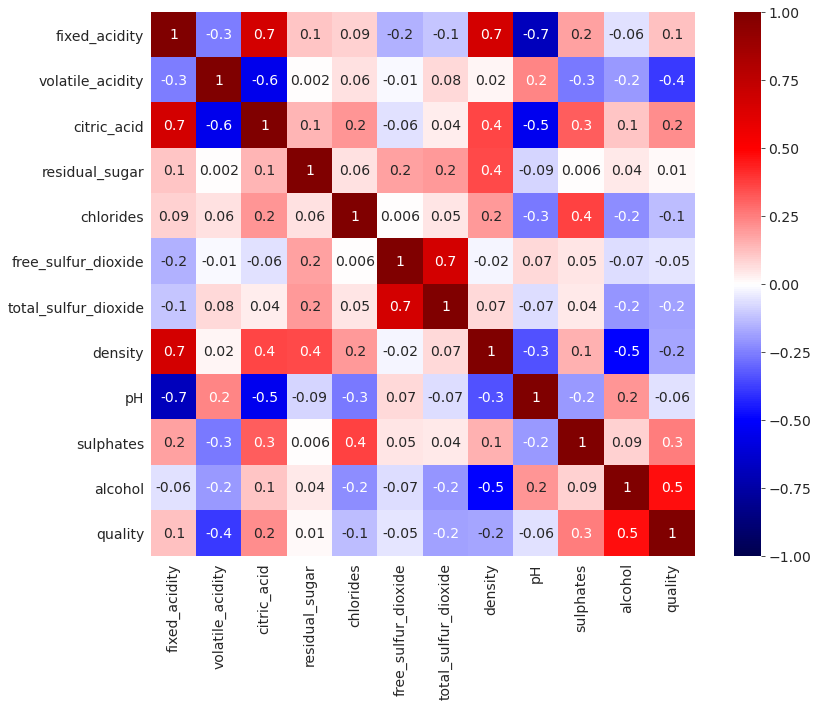

In [24]:
plt.figure(figsize=(14,10))
corr = wines_df.corr()
ax = sns.heatmap(
    corr,
    fmt='.1g',
    vmin=-1,vmax=1,center=0,
    annot=True,
    cmap='seismic',
    square=True
);

**Visualizing the dataset's correlation using seaborn heatmap reveals few points as below:**
<br>*Correlation greater than 0.7 or -0.7 is considered highly correlated*
- ***fixed_acidity*** and ***citric_acid*** are ***highly positively*** correlated
- ***fixed_acidity*** and ***density*** are ***highly positively*** correlated
- ***fixed_acidity*** and ***pH*** are ***highly negatively*** correlated
- ***free_sulfur_dioxide*** and ***total_sulfur_dioxide*** are ***highly positively*** correlated

Let's start with analyzing the ***quality*** using ***sns.histplot***.

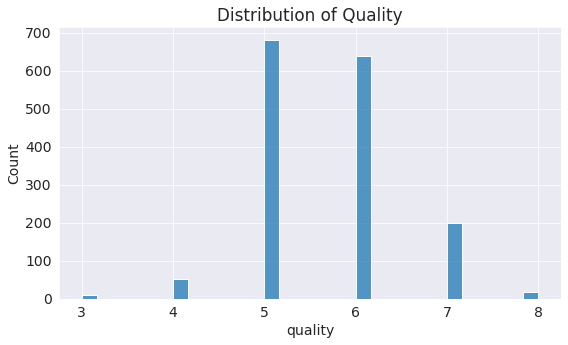

In [25]:
sns.histplot(wines_df.quality, legend=True).set_title("Distribution of Quality");

On a scale of 1-10, the majority of wine quality lies in the range of 5-7. The highest quality is 8 and lowest quality is 3.

#### Let's start now with analyzing the ***quality*** with some other highly correlated columns using ***sns.barplot***
- ***volatile_acidity*** vs ***quality***
- ***alcohol*** vs ***quality***
- ***sulphates*** vs ***quality***

**quality vs volatile_acidity**

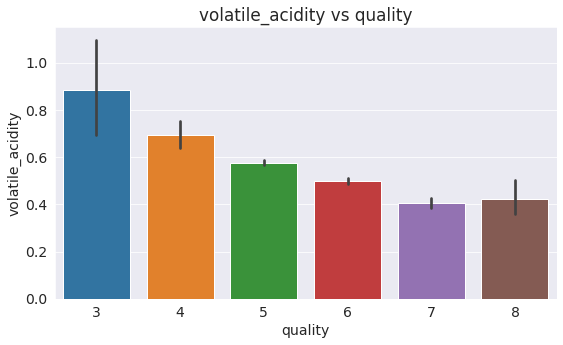

In [26]:
sns.barplot(x=wines_df.quality, y=wines_df.volatile_acidity).set_title("volatile_acidity vs quality");

Using the above boxplot, it seems that ***volatile_acidity*** in the range of ***0.3 to 0.5*** results in ***best quality wine***. Also, it can be noted that ***lower the volatile_acidity higher the quality***.

**quality vs alcohol**

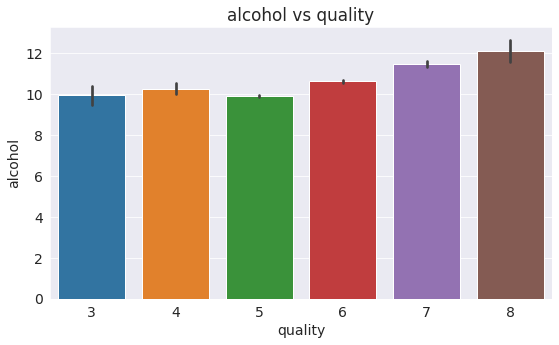

In [27]:
sns.barplot(x=wines_df.quality, y=wines_df.alcohol).set_title("alcohol vs quality");

Using the above boxplot, it seems that ***alcohol*** in the range of ***11 to 13*** results in ***best quality wine***. Also, it can be noted that ***higher the alcohol higher the quality***.

**quality vs sulphates**

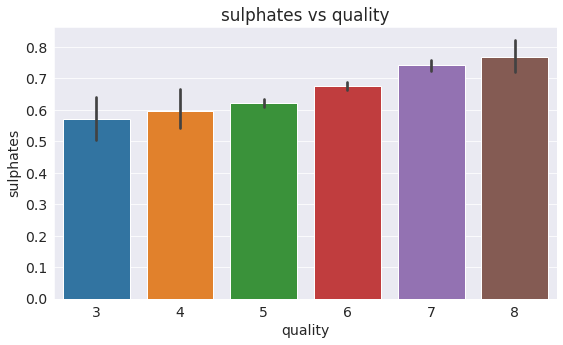

In [28]:
sns.barplot(x=wines_df.quality, y=wines_df.sulphates).set_title("sulphates vs quality");

Using the above boxplot, it seems that ***sulphates*** in the range of ***0.7 to 0.9*** results in ***best quality wine***. Also, it can be noted that ***higher the sulphates higher the quality***.

Let us save and upload our work to Jovian before continuing

In [29]:
import jovian

In [30]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "d-lokesh16/zerotopandas-analysis-red-wine-quality" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/d-lokesh16/zerotopandas-analysis-red-wine-quality


'https://jovian.ai/d-lokesh16/zerotopandas-analysis-red-wine-quality'

## Asking and Answering Questions

Let further analyze some interesting question about the dataset.
- What type of distribution is **'Quality'** in the dataset?
- **free_sulfur_dioxide** has high standard deviation. Try to find and remove the outliers.
- correlation between **free_sulfur_dioxide** and **quality** by comparing original and outlier removed datasets
- **total_sulfur_dioxide** has high standard deviation. Try to find and remove the outliers.
- correlation between **total_sulfur_dioxide** and **quality** by comparing original and outlier removed datasets


In [31]:
import numpy as np
import pandas as pd

#### Q1: What type of distribution is 'Quality' in the dataset?

To find the type of distribution, we will use **distplot** from **seaborn**

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


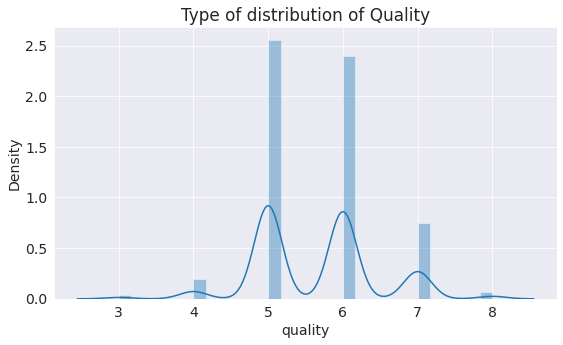

In [32]:
sns.distplot(wines_df.quality).set_title("Type of distribution of Quality");

As seen in the above visualization, the distribution of **Quality** in the dataset is **bimodal distibution** having 2 peaks for **quality 5 and 6**

#### Q2: *free_sulfur_dioxide* has high standard deviation. Try to find and remove the outliers.

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


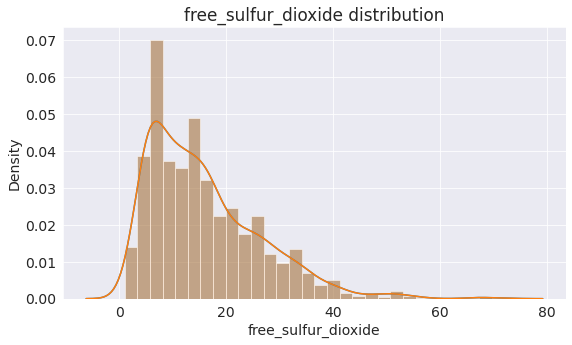

In [63]:
wines_df_copy = wines_df.copy()
sns.distplot(wines_df.free_sulfur_dioxide);
sns.distplot(wines_df_copy.free_sulfur_dioxide).set_title("free_sulfur_dioxide distribution");

From the above distribution graph, it is dervied that the distribution for ***free_sulfur_dioxide*** is ***right-skewed*** or ***positively-skewed***.
We will use
- **numpy.percentile** to calculate ***25%*** and ***75%*** of **free_sulfur_dioxide**

In [64]:
# calculate 25% and 75%
q25, q75 = np.percentile(wines_df_copy.free_sulfur_dioxide, 25), np.percentile(wines_df_copy.free_sulfur_dioxide, 75)
# calculate interquartile range
iqr = q75 - q25
# calculate the outlier cutoff
cut_off = iqr * 1.5
# calculate lower and upper threshold
lower, upper = q25 - cut_off, q75 + cut_off

print('iqr:' + str(iqr) + ' | cut_off:' + str(cut_off) + ' | lower:' + str(lower) + ' | upper:' + str(upper))

iqr:14.0 | cut_off:21.0 | lower:-14.0 | upper:42.0


In [65]:
# get outliers data
outliers_data_lower = [x for x in wines_df_copy.free_sulfur_dioxide if x < lower]
outliers_data_upper = [x for x in wines_df_copy.free_sulfur_dioxide if x > upper]

In [66]:
# filter dataset for data lower outliers
wines_df_outliers_lower = wines_df_copy[wines_df_copy['free_sulfur_dioxide'].isin(outliers_data_lower)]
wines_df_outliers_lower

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality


In [67]:
# filter dataset for data upper outliers
wines_df_outliers_upper = wines_df_copy[wines_df_copy['free_sulfur_dioxide'].isin(outliers_data_upper)]
wines_df_outliers_upper

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
15,8.9,0.620,0.18,3.80,0.176,52.0,145.0,0.99860,3.16,0.88,9.2,5
16,8.9,0.620,0.19,3.90,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,5
58,7.5,0.630,0.12,5.10,0.111,50.0,110.0,0.99830,3.26,0.77,9.4,5
397,6.6,0.735,0.02,7.90,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,5
401,6.6,0.735,0.02,7.90,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,5
498,7.2,0.340,0.32,2.50,0.090,43.0,113.0,0.99660,3.32,0.79,11.1,5
523,8.2,0.390,0.49,2.30,0.099,47.0,133.0,0.99790,3.38,0.99,9.8,5
585,11.8,0.330,0.49,3.40,0.093,54.0,80.0,1.00020,3.30,0.76,10.7,7
635,7.9,0.350,0.21,1.90,0.073,46.0,102.0,0.99640,3.27,0.58,9.5,5
679,8.3,0.780,0.10,2.60,0.081,45.0,87.0,0.99830,3.48,0.53,10.0,5


In [68]:
# filter dataset for data lower and upper outliers
outliers_lower = wines_df_copy.free_sulfur_dioxide < lower
outliers_upper = wines_df_copy.free_sulfur_dioxide > upper

In [69]:
print(outliers_lower.value_counts())
print(outliers_upper.value_counts())

False    1599
Name: free_sulfur_dioxide, dtype: int64
False    1569
True       30
Name: free_sulfur_dioxide, dtype: int64


In [70]:
# replace lower outliers with lower iqr value, upper outliers with upper iqr value 
wines_df_copy.free_sulfur_dioxide.where(~outliers_lower, lower, inplace=True)
wines_df_copy.free_sulfur_dioxide.where(~outliers_upper, upper, inplace=True)

In [71]:
outliers_lower = wines_df_copy.free_sulfur_dioxide < lower
outliers_upper = wines_df_copy.free_sulfur_dioxide > upper

In [72]:
print(outliers_lower.value_counts())
print(outliers_upper.value_counts())

False    1599
Name: free_sulfur_dioxide, dtype: int64
False    1599
Name: free_sulfur_dioxide, dtype: int64


/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


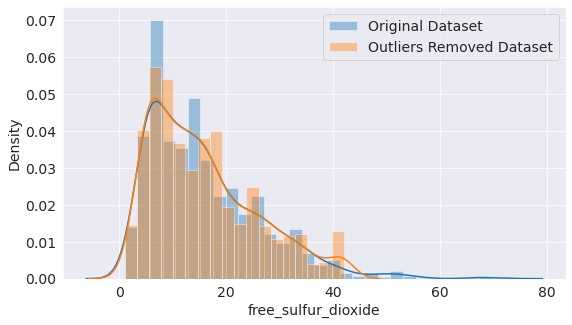

In [73]:
# Let's plot distribution plot for both original and outliers removed datasets
sns.distplot(wines_df.free_sulfur_dioxide, label='Original Dataset');
sns.distplot(wines_df_copy.free_sulfur_dioxide, label='Outliers Removed Dataset');
plt.legend();
plt.show();

#### Q3: *correlation* between ***free_sulfur_dioxide*** and ***quality*** by comparing *original* and *outlier removed* datasets

In [78]:
correlations_original = wines_df.corr()
correlations_outliers_removed = wines_df_copy.corr()

In [82]:
correlations_original["quality"]["free_sulfur_dioxide"]

-0.05065605724427594

In [83]:
correlations_outliers_removed["quality"]["free_sulfur_dioxide"]

-0.05064074891762818

It is seen that the change in correlation is very minimal after removal of the outliers.

#### Q4: *total_sulfur_dioxide* has high standard deviation. Try to find and remove the outliers.

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


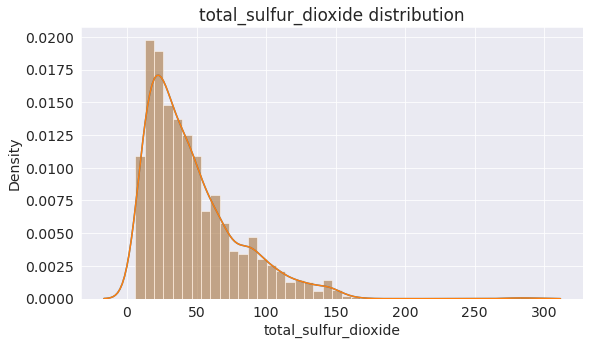

In [98]:
wines_df_copy = wines_df.copy()
sns.distplot(wines_df.total_sulfur_dioxide);
sns.distplot(wines_df_copy.total_sulfur_dioxide).set_title("total_sulfur_dioxide distribution");

From the above distribution graph, it is dervied that the distribution for ***total_sulfur_dioxide*** is ***right-skewed*** or ***positively-skewed***.
We will use
- **numpy.percentile** to calculate ***25%*** and ***75%*** of **total_sulfur_dioxide**

In [99]:
# calculate 25% and 75%
q25, q75 = np.percentile(wines_df_copy.total_sulfur_dioxide, 25), np.percentile(wines_df_copy.total_sulfur_dioxide, 75)
# calculate interquartile range
iqr = q75 - q25
# calculate the outlier cutoff
cut_off = iqr * 1.5
# calculate lower and upper threshold
lower, upper = q25 - cut_off, q75 + cut_off

print('iqr:' + str(iqr) + ' | cut_off:' + str(cut_off) + ' | lower:' + str(lower) + ' | upper:' + str(upper))

iqr:40.0 | cut_off:60.0 | lower:-38.0 | upper:122.0


In [100]:
# get outliers data
outliers_data_lower = [x for x in wines_df_copy.total_sulfur_dioxide if x < lower]
outliers_data_upper = [x for x in wines_df_copy.total_sulfur_dioxide if x > upper]

In [101]:
# filter dataset for data lower outliers
wines_df_outliers_lower = wines_df_copy[wines_df_copy['total_sulfur_dioxide'].isin(outliers_data_lower)]
wines_df_outliers_lower

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality


In [102]:
# filter dataset for data upper outliers
wines_df_outliers_upper = wines_df_copy[wines_df_copy['total_sulfur_dioxide'].isin(outliers_data_upper)]
wines_df_outliers_upper

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
15,8.9,0.620,0.18,3.8,0.176,52.0,145.0,0.99860,3.16,0.88,9.2,5
16,8.9,0.620,0.19,3.9,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,5
87,8.6,0.490,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6
89,9.3,0.390,0.44,2.1,0.107,34.0,125.0,0.99780,3.14,1.22,9.5,5
91,7.9,0.520,0.26,1.9,0.079,42.0,140.0,0.99640,3.23,0.54,9.5,5
92,8.6,0.490,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6
93,8.6,0.490,0.29,2.0,0.110,19.0,133.0,0.99720,2.93,1.98,9.8,5
110,8.1,0.785,0.52,2.0,0.122,37.0,153.0,0.99690,3.21,0.69,9.3,5
131,8.0,0.745,0.56,2.0,0.118,30.0,134.0,0.99680,3.24,0.66,9.4,5
146,8.1,0.670,0.55,1.8,0.117,32.0,141.0,0.99680,3.17,0.62,9.4,5


In [103]:
# filter dataset for data lower and upper outliers
outliers_lower = wines_df_copy.total_sulfur_dioxide < lower
outliers_upper = wines_df_copy.total_sulfur_dioxide > upper

In [104]:
print(outliers_lower.value_counts())
print(outliers_upper.value_counts())

False    1599
Name: total_sulfur_dioxide, dtype: int64
False    1544
True       55
Name: total_sulfur_dioxide, dtype: int64


In [105]:
# replace lower outliers with lower iqr value, upper outliers with upper iqr value 
wines_df_copy.total_sulfur_dioxide.where(~outliers_lower, lower, inplace=True)
wines_df_copy.total_sulfur_dioxide.where(~outliers_upper, upper, inplace=True)

In [106]:
outliers_lower = wines_df_copy.total_sulfur_dioxide < lower
outliers_upper = wines_df_copy.total_sulfur_dioxide > upper

In [107]:
print(outliers_lower.value_counts())
print(outliers_upper.value_counts())

False    1599
Name: total_sulfur_dioxide, dtype: int64
False    1599
Name: total_sulfur_dioxide, dtype: int64


/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


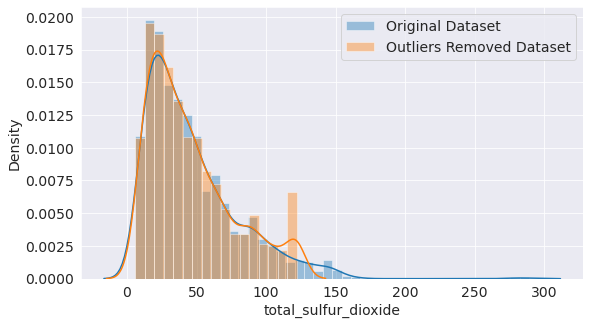

In [108]:
# Let's plot distribution plot for both original and outliers removed datasets
sns.distplot(wines_df.total_sulfur_dioxide, label='Original Dataset');
sns.distplot(wines_df_copy.total_sulfur_dioxide, label='Outliers Removed Dataset');
plt.legend();
plt.show();

#### Q5: *correlation* between ***free_sulfur_dioxide*** and ***quality*** by comparing *original* and *outlier removed* datasets

In [109]:
correlations_original = wines_df.corr()
correlations_outliers_removed = wines_df_copy.corr()

In [110]:
correlations_original["quality"]["total_sulfur_dioxide"]

-0.1851002889265377

In [111]:
correlations_outliers_removed["quality"]["total_sulfur_dioxide"]

-0.2015424775158861

It is seen that the change in correlation is significant after removal of the outliers.

Let us save and upload our work to Jovian before continuing.

In [112]:
import jovian

In [113]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "d-lokesh16/zerotopandas-analysis-red-wine-quality" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/d-lokesh16/zerotopandas-analysis-red-wine-quality


'https://jovian.ai/d-lokesh16/zerotopandas-analysis-red-wine-quality'

## Inferences and Conclusion

- The majority of wine quality lies in the range of 5-7 on a sclae of 0-10
- Volatile acidity, Sulphates, Alcohol are most correlated with Quality
- Volatile acidity in the range of 0.3 to 0.5 results in best quality wine. Also, lower the volatile_acidity higher the quality.
- Alcohol in the range of 11 to 13 results in best quality wine. Also, higher the alcohol higher the quality.
- Sulphates in the range of 0.7 to 0.9 results in best quality wine. Also, higher the sulphates higher the quality.


In [114]:
import jovian

In [115]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "d-lokesh16/zerotopandas-analysis-red-wine-quality" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/d-lokesh16/zerotopandas-analysis-red-wine-quality


'https://jovian.ai/d-lokesh16/zerotopandas-analysis-red-wine-quality'

## References and Future Work

- The dataset which has the outliers removed can be further fine tuned to develop a ML model to predict the quality of the wine.
- Model can further be incorporated in a simple website or app to help winemaker understand the final quality of their wine or to improve their wine quality.

In [118]:
import jovian

In [119]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "d-lokesh16/zerotopandas-analysis-red-wine-quality" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/d-lokesh16/zerotopandas-analysis-red-wine-quality


'https://jovian.ai/d-lokesh16/zerotopandas-analysis-red-wine-quality'